# Predicting Medical Insurance Premiums using Regression

The goal of this project is to predict the health insurance cost incurred by individuals based on their age, gender, BMI, number of childrem, smoking habits and location

The [dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) was exported from Kaggle and curated by user Miri Choi. 

|Variable|Description|
|------|:--------|
|`age`|Age of primary beneficiary|
|`sex`|Insurance contractor gender, female, male|
|`bmi`|Body mass index, providing an understanding of body, weights that are relatively high <br>or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of <br>height to weight, ideally 18.5 to 24.9|
|`children`|Number of children covered by health insurance / Number of dependents|
|`smoker`|Smoking|
|`region`|The beneficiary's residential area in the US, northeast, southeast, southwest, northwest|
|`charges`|Individual medical costs billed by health insurance|

## Project Outline
1 - Data ingestion and cleaning <br>
2 - Feature engineering <br>
3 - Evaluating linear regression models <br>
4 - Summary <br>

## Project Conclusions

Following data ingestion and cleaning, categorical variables were encoded using numerical values. Next, a linear regression model was used to predict health care premiums based on the relevant features. The linear regression model performed moderately well (accuracy $\approx$ 75%), using an artifical neural network (trained for 100 epochs) performed better with an accuracy of approximately 85%. 

![calculating health insrance premium](hcprem.jpeg)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data ingestion and cleaning

In [2]:
# read the csv file 
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# check if there are any Null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Grouping by region to see any relationship between region and charges
df.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


__Insight:__ Seems like south east region has the highest charges and body mass index


### Feature Engineering

In [7]:
# converting gender and smoker variable to numerical values
df['sex'] = df['sex'].apply(lambda x: 0 if x == 'male' else 1)
df['smoker'] = df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

# dealing with the region column
region_dummies = pd.get_dummies(df['region'], drop_first = True)
df = pd.concat([df, region_dummies], axis = 1)
df.drop(['region'], axis = 1, inplace = True)

df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0


## Exploratory Data Analyses

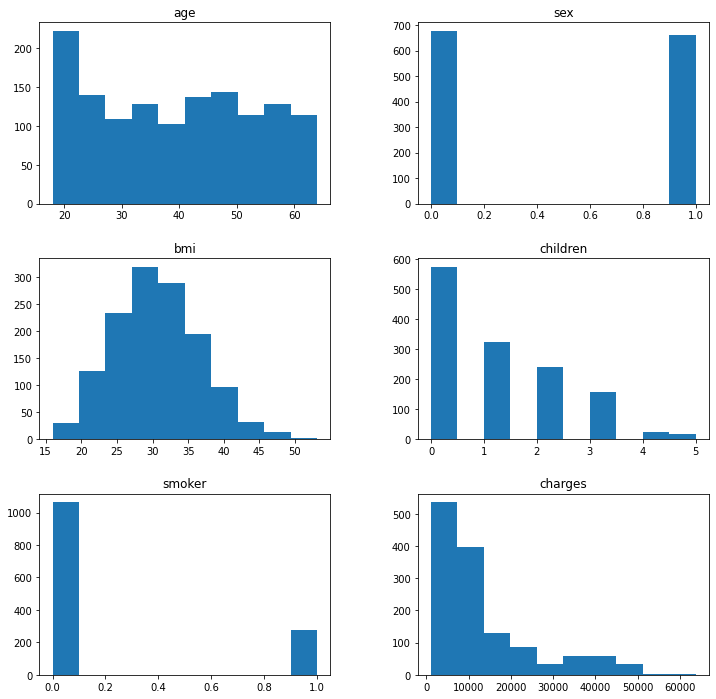

In [8]:
df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(figsize=(12,12), grid=False);

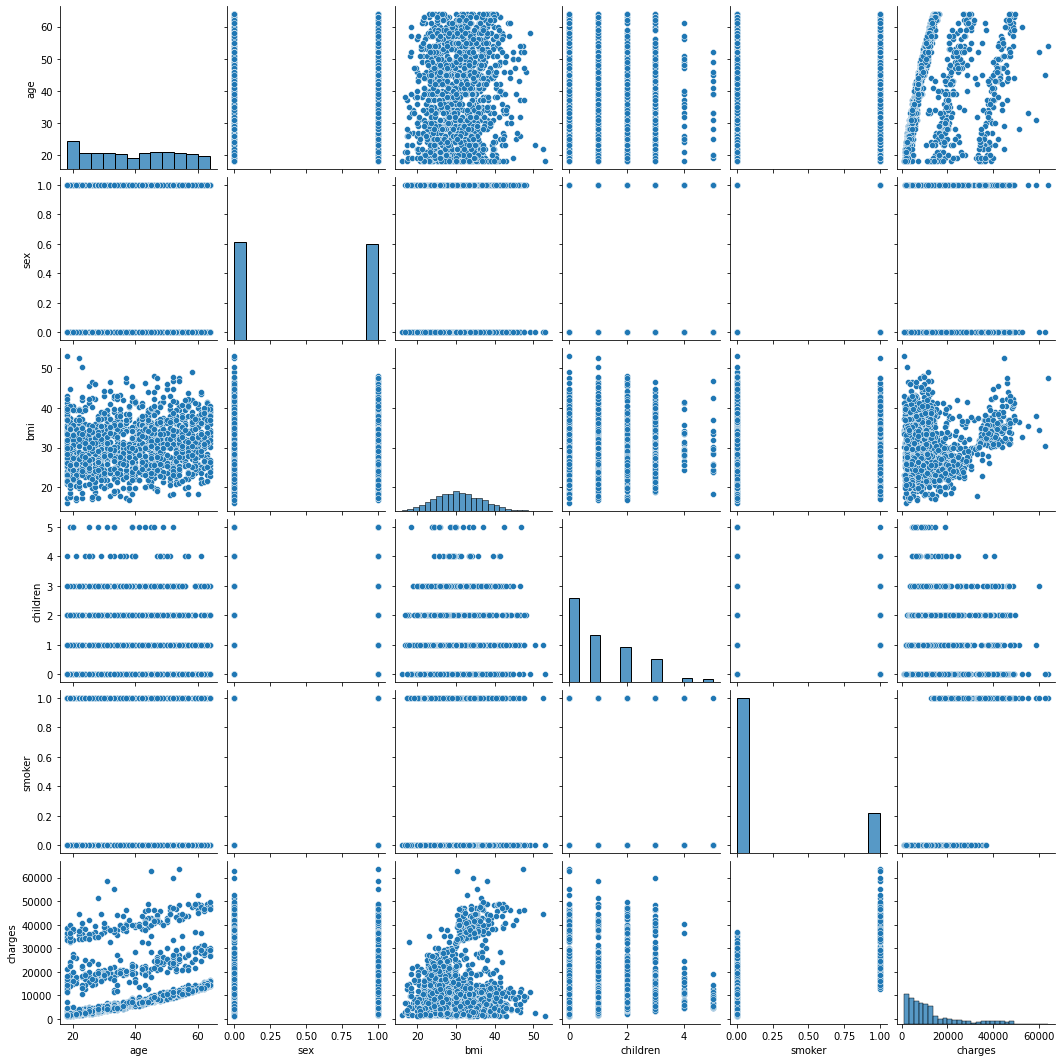

In [9]:
# plot pairplot
sns.pairplot(df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']]);

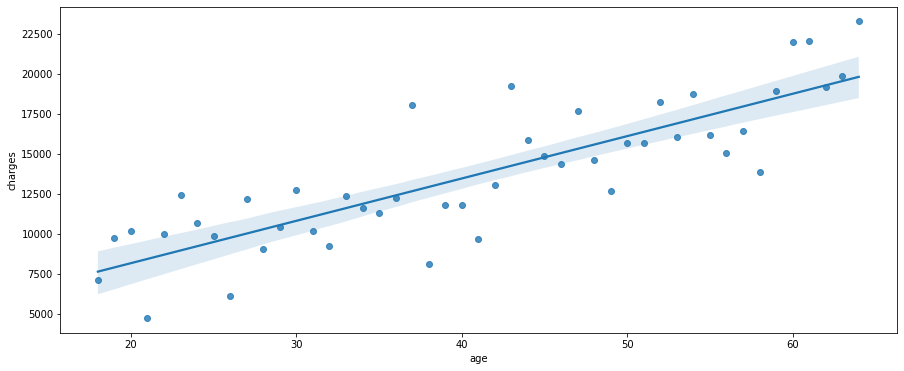

In [10]:
reg_df = df.groupby('age')['charges'].mean().to_frame().reset_index()
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = reg_df)
plt.show()

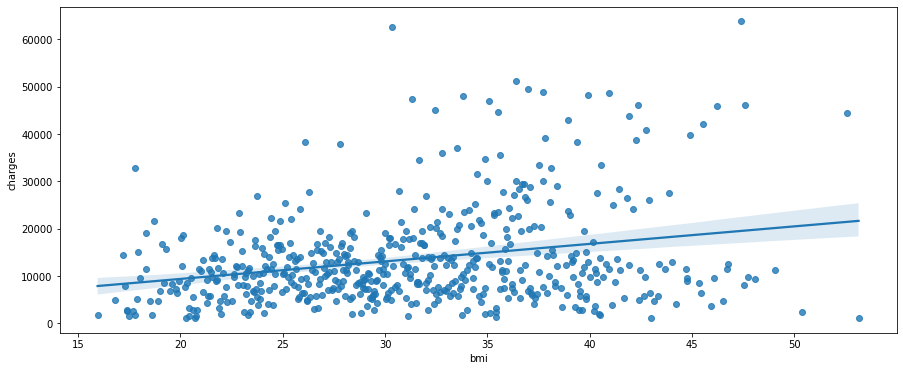

In [11]:
reg_df = df.groupby('bmi')['charges'].mean().to_frame().reset_index()
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = reg_df)
plt.show()

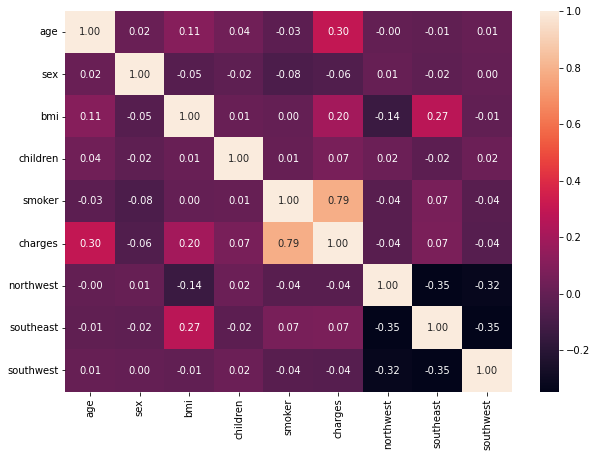

In [12]:
corr = df.corr()
plt.figure(figsize = (10, 7))
sns.heatmap(corr, annot=True, fmt='0.2f');

## Premium prediction using ML Regression

In [13]:
# defining the features (X) and the target (y)
X = df.drop(columns=['charges'], axis=1)
y = df['charges']

In [14]:
print(X.shape)
X.head()

(1338, 8)


,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,1,27.900,0,1,0,0,1
1,18,0,33.770,1,0,0,1,0
2,28,0,33.000,3,0,0,1,0
3,33,0,22.705,0,0,1,0,0
4,32,0,28.880,0,0,1,0,0


In [15]:
print(y.shape)
y.head()

(1338,)


0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [16]:
# reshaping the data
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')
y = y.reshape(-1,1)

In [17]:
# scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [18]:
# splitting the data into training and testing sets for supervised ML
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape)

(1003, 8) (335, 8)


#### Evaluating a linear regression model

In [19]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [20]:
model_lr_accuracy = model_lr.score(X_test, y_test)
model_lr_accuracy

0.79587863074542

In [21]:
# calculate the predications
y_predict = model_lr.predict(X_test)

# revert scaled values to original
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

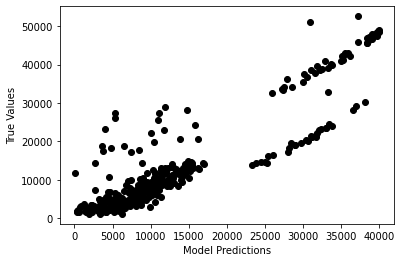

In [23]:
# plot the predictions vs. the true values
plt.plot(y_predict_orig, y_test_orig, "o", color = 'k')
plt.xlabel('Model Predictions')
plt.ylabel('True Values');

In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 5668.84 
MSE = 32135746.0 
MAE = 4012.7148 
R2 = 0.7958786360579042 
Adjusted R2 = 0.7908695228323313


#### Evaluating an artificial neural network-based regression model

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [26]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0

In [27]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_hist = ANN_model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=0.2)

Epoch 1/100
41/41 [==============================] - 2s 12ms/step - loss: 0.7083 - val_loss: 0.3772
Epoch 2/100
41/41 [==============================] - 0s 8ms/step - loss: 0.3547 - val_loss: 0.3386
Epoch 3/100
41/41 [==============================] - 0s 8ms/step - loss: 0.3056 - val_loss: 0.2989
Epoch 4/100
41/41 [==============================] - 0s 11ms/step - loss: 0.2597 - val_loss: 0.3081
Epoch 5/100
41/41 [==============================] - 0s 11ms/step - loss: 0.2490 - val_loss: 0.2799
Epoch 6/100
41/41 [==============================] - 0s 9ms/step - loss: 0.2500 - val_loss: 0.3081
Epoch 7/100
41/41 [==============================] - 0s 10ms/step - loss: 0.2322 - val_loss: 0.2872
Epoch 8/100
41/41 [==============================] - 0s 9ms/step - loss: 0.2242 - val_loss: 0.3336
Epoch 9/100
41/41 [==============================] - 0s 6ms/step - loss: 0.2304 - val_loss: 0.2726
Epoch 10/100
41/41 [==============================] - 0s 6ms/step - loss: 0.2059 - val_loss: 0.2834
Epoch

In [28]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

11/11 [==============================] - 0s 2ms/step - loss: 0.1510
Accuracy : 0.8489917516708374


In [29]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

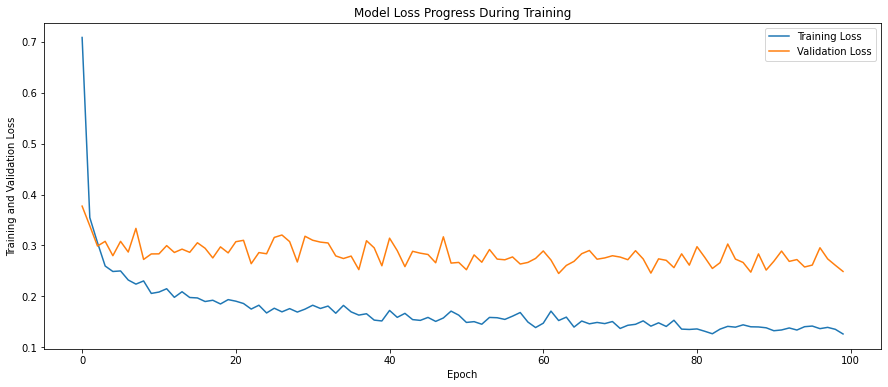

In [32]:
plt.figure(figsize=(15,6))
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss']);

In [33]:
y_predict = ANN_model.predict(X_test)

y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

11/11 [==============================] - 0s 2ms/step


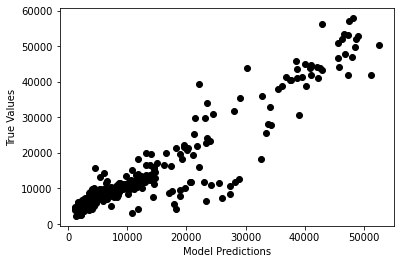

In [34]:
plt.plot(y_test_orig, y_predict_orig, "o", color = 'k')
plt.xlabel('Model Predictions')
plt.ylabel('True Values');

In [35]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 4704.165 
MSE = 22129166.0 
MAE = 3242.632 
R2 = 0.8594389138436169 
Adjusted R2 = 0.8559895620360983


## Summary

The goal of this project was to predict the insurance premium of customers based on certain demographic factors, including their age, gender, BMI, amongst others. 

Although the linear regression model performed moderately well at predicting the the premium, using an artifical neural network performed better with an accuracy of approximately 85%. 